In [1]:
import geopandas as gpd
import pandas as pd
import os
import matplotlib.pyplot as plt

os.chdir("../")
from epitools import get_data

In [2]:
year = 2018

In [3]:
gdf = gpd.read_file("https://raw.githubusercontent.com/strotgen/mexico-leaflet/master/states.geojson")
gdf = gdf.rename(columns={"state_code": "state_id"})
gdf.head()

,id,state_id,state_name,geometry
0,None,9,Distrito Federal,"POLYGON ((-99.09052 19.50926, -99.06421 19.498..."
1,None,12,Guerrero,"POLYGON ((-100.53878 18.84399, -100.50201 18.8..."
2,None,15,México,"POLYGON ((-99.85919 20.26838, -99.85950 20.264..."
3,None,17,Morelos,"POLYGON ((-99.06199 19.04877, -99.02935 19.085..."
4,None,25,Sinaloa,"POLYGON ((-108.47046 27.03457, -108.42165 27.0..."


In [8]:
df = get_data(
    country="Mexico",
    year=year,
    aggregation="state_id",
    election="first_round",
    method="nv"
)
df["state_id"] = df["state_id"].astype(int)
df.head()


,state_id,epi,epi_between,epi_within,year
0,1,0.868835,0.781271,0.087564,2018
1,10,0.858696,0.752754,0.105942,2018
2,11,0.892461,0.779092,0.113368,2018
3,12,0.797759,0.664078,0.133681,2018
4,13,0.776333,0.690465,0.085867,2018


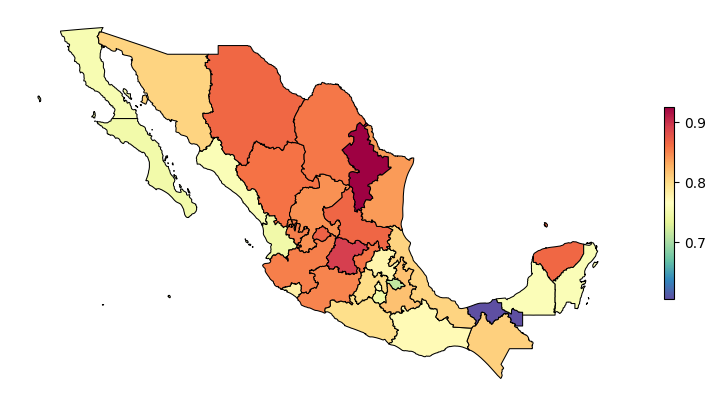

In [9]:
data = pd.merge(gdf, df, on="state_id")

fig, ax = plt.subplots(figsize=(8, 8), dpi=100)

data.plot(
    column="epi",
    edgecolor="black",
    lw=0.75,
    cmap="Spectral_r",
    legend=True, 
    legend_kwds=dict(
        shrink=0.25
    ),
    ax=ax
)

ax.axis("off")
fig.tight_layout()